### Transformations of $\mathbb{R}^2$

In [3]:
# Reflection about the mirror line passing through the origin and parallel to the vector u = (a, b).

def refMat2D(u):
    a, b = u
    return matrix([[(a^2 - b^2)/(a^2 + b^2), (2*a*b)/(a^2 + b^2)], [(2*a*b)/(a^2 + b^2), (b^2 - a^2)/(a^2 + b^2)]])

# Rotation about the origin with angle theta. The direction of rotation is counterclockwise if theta > 0, and clockwise if theta < 0.

def rotMat2D(theta):
    return matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

# Orthogonal Projection onto the line passing through the origin and parallel to the vector u = (a, b).

def projMat2D(u):
    a, b = u
    return matrix([[a^2/(a^2 + b^2), (a*b)/(a^2 + b^2)], [(a*b)/(a^2 + b^2), b^2/(a^2 + b^2)]])

#Contraction (resp. Dilation) with contraction (resp. dilation) factor 0 <= c < 1 (resp. c > 1)

def conDilMat2D(c):
    return matrix([[c, 0], [0, c]])

# Compression (resp. Expansion) in x-direction with compression (resp. expansion) factor 0 <= c < 1 (resp. c > 1)

def compExpXMat2D(c):
    return matrix([[c, 0], [0, 1]])

# Shear/Slanting in the positive (resp. negative) x-direction with shearing factor c > 0 (resp. c < 0)

def shearXMat2D(c):
    return matrix([[1, c], [0, 1]])

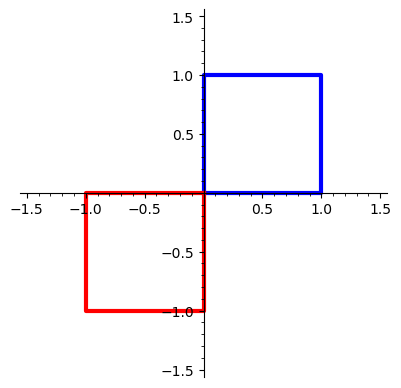

In [4]:
# Illustration No. 1

from sage.plot.colors import *

v1 = vector([0, 0])
v2 = vector([0, 1])
v3 = vector([1, 1])
v4 = vector([1, 0])

origSquare = line([v1, v2, v3, v4, v1], color = blue, thickness = 3, zorder = 0)
transSquare = line([refMat2D([-1, 1])*v for v in [v1, v2, v3, v4, v1]], color = red, thickness = 3, zorder = 1)

squares = origSquare + transSquare

squares.show(xmin = -1.5, xmax = 1.5, ymin = -1.5, ymax = 1.5, aspect_ratio = 1)

Animation with 20 frames
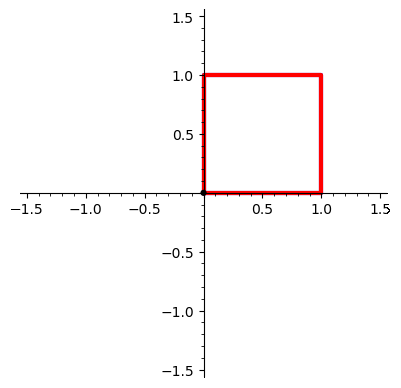

In [5]:
# Illustration No. 2

from sage.plot.colors import *

v1 = vector([0, 0])
v2 = vector([0, 1])
v3 = vector([1, 1])
v4 = vector([1, 0])

center = point((0, 0), color = 'black', size = 20, zorder = 2)
origSquare = line([v1, v2, v3, v4, v1], color = blue, thickness = 3, zorder = 0)

frames = [center + origSquare + line([rotMat2D(theta)*v for v in [v1, v2, v3, v4, v1]], color = 'red', thickness = 3, zorder = 1 ) for theta in sxrange(0, 2*pi, pi/10) ]

rotatingSquare = animate(frames, xmin = -1.5, xmax = 1.5, ymin = -1.5, ymax = 1.5, aspect_ratio = 1)
rotatingSquare.show()

Animation with 20 frames
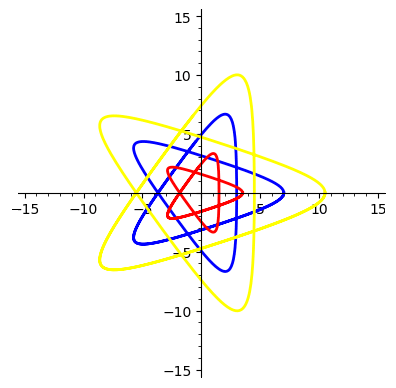

In [6]:
# Illustration No. 3

from sage.plot.colors import *

A = conDilMat2D(1.5)
B = conDilMat2D(0.5)

def v(t):
    x = 2*cos(t) + 5*cos(2*t/3)
    y = 2*sin(t) - 5*sin(2*t/3)

    return vector((x, y))

t = var('t')
frames = [parametric_plot(v(t), (t, 0, 8*pi), thickness = 2, color = blue, aspect_ratio = 1) + \
          parametric_plot(rotMat2D(theta)*A*v(t), (t, 0, 8*pi), thickness = 2, color = yellow, aspect_ratio = 1) + \
          parametric_plot(rotMat2D(-theta)*B*v(t), (t, 0, 8*pi), thickness = 2, color = red, aspect_ratio = 1) for theta in sxrange(0, 2*pi, pi/10)]

rotatingStars = animate(frames, xmin = -15, xmax = 15, ymin = -15, ymax = 15, aspect_ratio = 1)
rotatingStars.show()

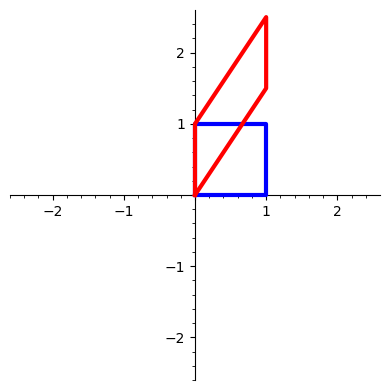

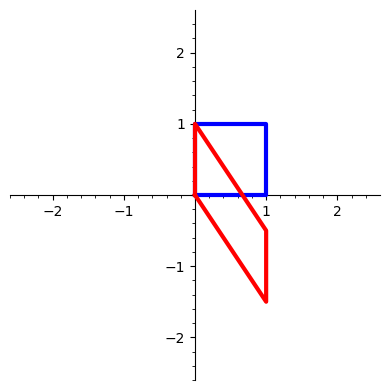

In [8]:
# Illustration No. 4

# Shear Matrix (y-direction)

def shearYMat(factor):
    a = factor
    return matrix([[1, 0], [a, 1]])

v1 = vector([0, 0])
v2 = vector([0, 1])
v3 = vector([1, 1])
v4 = vector([1, 0])

origSq = line([v1, v2, v3, v4, v1], color = 'blue', thickness = 3, zorder = 10)
A = shearYMat(1.5)
newSq = line([A*vi for vi in [v1, v2, v3, v4, v1]], color = 'red', thickness = 3, zorder = 20)

Objs2D = origSq + newSq

show(Objs2D, xmin = -2.5, xmax = 2.5, ymin = -2.5, ymax = 2.5, aspect_ratio = true)

origSq = line([v1, v2, v3, v4, v1], color = 'blue', thickness = 3, zorder = 10)
A = shearYMat(-1.5)
newSq = line([A*vi for vi in [v1, v2, v3, v4, v1]], color = 'red', thickness = 3, zorder = 20)

Objs2D = origSq + newSq

show(Objs2D, xmin = -2.5, xmax = 2.5, ymin = -2.5, ymax = 2.5, aspect_ratio = true)

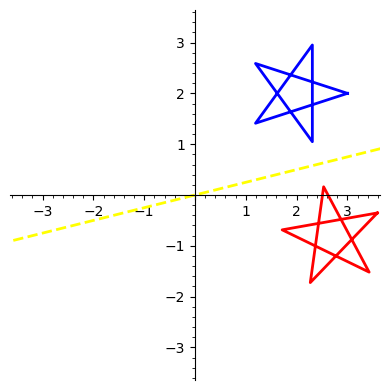

In [14]:
# Illustration No. 5

v = vector([1, 1/4])
A = refMat2D(v)

# Mirror Line
mirror2DG = line([-5*v, 5*v], color = 'yellow', thickness = 2, linestyle = '--')

# Original Polygon
verts = [vector((cos(2*k*pi/5) + 2, sin(2*k*pi/5) + 2)) for k in [0, 2, 4, 1, 3, 0]]
origPoly2DG = line(verts, color = 'blue', thickness = 2)

# New Polygon
newPoly2DG = line([ A*vert for vert in verts ], color = 'red', thickness = 2)

objs2DG = origPoly2DG + newPoly2DG + mirror2DG
objs2DG.show(xmin = -3.5, xmax = 3.5, ymin = -3.5, ymax = 3.5, aspect_ratio = 1)

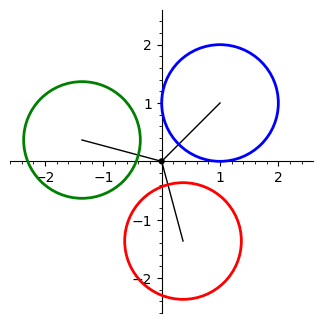

In [17]:
# Illustration No. 6

# Rotation Matrices
A = rotMat2D(-2*pi/3)
B = rotMat2D(2*pi/3)

# Original Circle
center = vector([1, 1])
origCircle2DG = circle(center, 1, color = 'blue', thickness = 2)

# Rotated Circles
newCircle12DG = circle(A*center, 1, color = 'red', thickness = 2 )
newCircle22DG = circle(B*center, 1, color = 'green', thickness = 2)

# Segments
segment12DG = line([(0, 0), center], color = 'black')
segment22DG = line([(0, 0), A*center], color = 'black')
segment32DG = line([(0, 0), B*center], color = 'black')

# Other Objects
origin2DG = point((0, 0), size = 20, color = 'black')

objs2DG = origCircle2DG + newCircle12DG + newCircle22DG + origin2DG + segment12DG + segment22DG + segment32DG
objs2DG.show( xmin = -2.5, xmax = 2.5, ymin = -2.5, ymax = 2.5, aspect_ratio = 1, figsize = 5 )

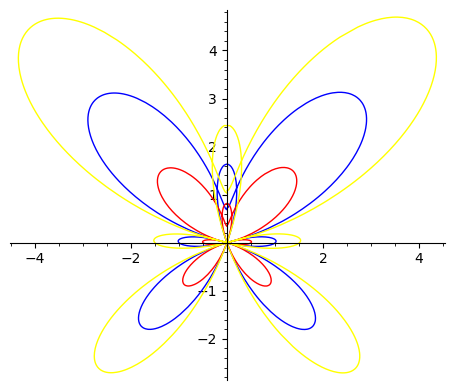

In [26]:
# Illustration No. 7

A = conDilMat2D(0.5)
B = conDilMat2D(1.5)

x(t) = sin(t)*(exp(cos(t)) - 2*cos(4*t) - (sin(t/12))^5)
y(t) = cos(t)*(exp(cos(t)) - 2*cos(4*t) - (sin(t/12))^5)
P(t) = (x(t), y(t))

parametric_plot(vector(P(t)), (t, 0, 2*pi) ) + parametric_plot(A*vector(P(t)), (t, 0, 2*pi), color = 'red') + \
parametric_plot(B*vector(P(t)), (t, 0, 2*pi), color = 'yellow')